In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import mxnet as mx
import gluoncv

### Load a sample image

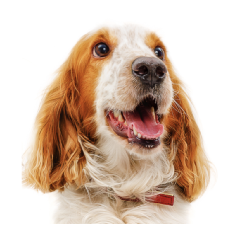

In [2]:
filename = './img/classification-demo.png'
img = mpimg.imread(filename)
plt.axis('off')
plt.imshow(img)

### Load a model from Model Zoo

In [3]:
model_name = 'ResNet50_v1d'

# Download and load the pre-trained model
net = gluoncv.model_zoo.get_model(model_name, pretrained=True)

### Load and transform image

In [4]:
img = mx.image.imread(filename)

# apply default data preprocessing
transformed_img = gluoncv.data.transforms.presets.imagenet.transform_eval(img)

### Prediction

In [5]:
pred = net(transformed_img)

# Map predicted values to probability by softmax
prob = mx.nd.softmax(pred)[0].asnumpy()

### Display top 5 scores

In [12]:
ind = mx.nd.topk(pred, k=5)[0].astype('int').asnumpy().tolist()

print('The input picture is classified to be')
for i in range(5):
    print('- [%s] with probability %.3f.'%(net.classes[ind[i]], prob[ind[i]]))

The input picture is classified to be
- [Welsh springer spaniel] with probability 0.899.
- [Irish setter] with probability 0.005.
- [Brittany spaniel] with probability 0.003.
- [cocker spaniel] with probability 0.002.
- [Blenheim spaniel] with probability 0.002.
